In [96]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [97]:
class Model(nn.Module):
    def __init__(self,in_features=4,h1=8,h2=9,out=3):
        super().__init__() #init nn.module
        self.fc1 = nn.Linear(in_features,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2,out)

    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)

        return x

In [98]:
# Pick a manual seed for randomization
torch.manual_seed(41)

#create instance of model
model = Model()


In [99]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [100]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [101]:
#change last column
my_df["species"] = my_df["species"].replace("setosa",0)
my_df["species"] = my_df["species"].replace("versicolor",1)
my_df["species"] = my_df["species"].replace("virginica",2)

/tmp/ipykernel_243549/3458404594.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df["species"] = my_df["species"].replace("virginica",2)


In [102]:
#train test and split things
#axis 1 -> column, axis 0 -> row
X = my_df.drop("species",axis=1)
y = my_df["species"]

In [103]:
X = X.values
y = y.values

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [106]:
#floats-> FloatTensor
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [107]:
# long for labels. 64 bit ints (long). Int
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [108]:
#measure criterion of model to measure error => how far pred from actual
criterion = nn.CrossEntropyLoss()
# choose Adam Optimizer, set learning rate (lr) 
# [if error doesnt go down after bunch of iterations(epochs)], lower lr
# lower lr => longer to train
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [109]:
#Train model
#Epoch? => one run through all the training data in network

#how many runs
epochs = 100
losses = []

for i in range(epochs):
    # go forward and get a predicition
    y_pred = model.forward(X_train) # get predicted results

    #measure loss/error
    loss = criterion(y_pred,y_train)

    losses.append(loss.detach().numpy())

    if (i%10==0):
        print(f"Epoch:{i} and loss: {loss}")

    # do back prop
    # take error rate of forward
    # take back thru network and fine tune weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch:0 and loss: 1.125285267829895
Epoch:10 and loss: 1.0188318490982056
Epoch:20 and loss: 0.8338496685028076
Epoch:30 and loss: 0.6025498509407043
Epoch:40 and loss: 0.41379639506340027
Epoch:50 and loss: 0.28254783153533936
Epoch:60 and loss: 0.19306635856628418
Epoch:70 and loss: 0.13670380413532257
Epoch:80 and loss: 0.10248854011297226
Epoch:90 and loss: 0.08341798931360245


Text(0.5, 0, 'epoch')

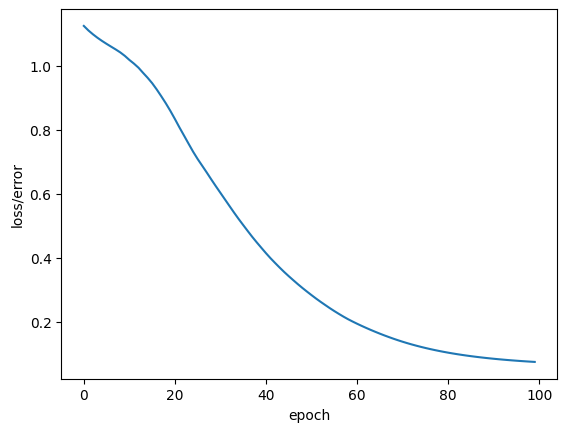

In [110]:
#graph it out
plt.plot(range(epochs),losses)
plt.ylabel("loss/error")
plt.xlabel("epoch")

In [111]:
# https://www.youtube.com/watch?v=rgBu8CbH9XY&ab_channel=Codemy.com

# vadliate on test data
with torch.no_grad(): #turn off back prop
    y_eval = model.forward(X_test) #X_tests are features, y_eval is pred
    loss = criterion(y_eval,y_test) #find error/loss

In [112]:
correct = 0

with torch.no_grad():
    for i,data in enumerate(X_test):
        y_val = model.forward(data)
        #print(f"{i+1}:{str(y_val)}\t{y_test[i]}") #predicted vs actual
        #highest number = what network thinks flower it is

        # correct or not
        if y_val.argmax().item()==y_test[i]:
            correct+=1

print(f"Correct:{correct}")

Correct:30


In [113]:
#https://www.youtube.com/watch?v=cQFdpbDzptI&ab_channel=Codemy.com

new_iris =  torch.tensor([4.7,3.2,1.3,0.2]) #new data point

In [114]:
with torch.no_grad():
    print(model(new_iris))

tensor([ 4.6472, -2.3355, -2.9044])


In [115]:
# https://www.youtube.com/watch?v=KvshNSVBuaI&ab_channel=Codemy.com

# Save our NN model

torch.save(model.state_dict(),"iris_model.pt")

In [116]:
# load saved NN model
new_model = Model()

new_model.load_state_dict(torch.load("iris_model.pt"))

<All keys matched successfully>

In [117]:
new_model.eval() #make sure it loaded properly

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)